In [9]:
import pandas as pd
import numpy as np
pickles = pd.read_csv('/home/ekaterina/Documents/Matching_Catalogs/share/spectralclasses_padded.csv',
                     skiprows=49)
mamajek = pd.read_csv('/home/ekaterina/Documents/Matching_Catalogs/share/spectralclasses_Teff_colors_magnitudes_mamajek_22032018.txt',
                      delim_whitespace=True)
mamajek = mamajek.rename(index=str, columns={'#SpT':'spec_class','Teff':'T'})

In [10]:
pickles.tail()
pickles.spec_class = pickles.spec_class.str.strip()
pickles = pickles.drop_duplicates()
pickles = pickles[pickles.lum_class.str.strip() == 'V']
pickles.head()

,spec_class,lum_class,u_g,g_r,r_i,i_z,z_J,J_H,H_K,Jmag_abs
0,O9,V,-0.32,-0.62,-0.35,-0.36,0.24,-0.16,-0.11,-3.81
1,B0,V,-0.25,-0.59,-0.35,-0.32,0.19,-0.11,-0.04,-2.80
2,B1,V,-0.13,-0.49,-0.33,-0.26,0.13,-0.06,-0.03,-2.03
3,B3,V,0.18,-0.46,-0.26,-0.26,0.20,-0.22,-0.08,-1.55
4,B5,V,0.51,-0.39,-0.23,-0.23,0.27,-0.01,-0.02,-1.37


In [11]:
df = mamajek
df[(df == '...')  | (df == '....') | (df == '.....')] = np.nan
df.spec_class = df.spec_class.str[:-1]
df.head()   

,spec_class,T,logT,BCv,Mv,logL,B-V,Bt-Vt,V-G,U-B,...,Msun,logAge,b-y,M_J,M_Ks,Mbol,i-z,z-Y,R_Rsun,#SpT.1
0,O3,46000,4.663,-4.05,-5.7,5.80,-0.32,NaN,NaN,-1.22,...,NaN,NaN,NaN,NaN,NaN,-9.75,NaN,NaN,12.5,O3V
1,O4,43000,4.633,-3.92,-5.5,5.67,-0.32,NaN,NaN,-1.20,...,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,12.3,O4V
2,O5,41500,4.618,-3.77,-5.4,5.58,-0.32,NaN,NaN,-1.19,...,NaN,NaN,-0.133,NaN,NaN,-9.20,NaN,NaN,11.9,O5V
3,O5.5,40000,4.602,-3.65,-5.2,5.46,-0.32,NaN,NaN,-1.18,...,NaN,NaN,-0.133,NaN,NaN,-8.90,NaN,NaN,11.2,O5.5V
4,O6,39000,4.591,-3.57,-5.1,5.37,-0.32,NaN,NaN,-1.17,...,NaN,NaN,-0.132,NaN,NaN,-8.67,NaN,NaN,10.6,O6V


In [14]:
mamajek = df
merged = mamajek.merge(pickles, on='spec_class', how='outer')
merged.describe()
merged.columns

Index(['spec_class', 'T', 'logT', 'BCv', 'Mv', 'logL', 'B-V', 'Bt-Vt', 'V-G',
       'U-B', 'V-Rc', 'V-Ic', 'V-Ks', 'J-H', 'H-K', 'Ks-W1', 'W1-W2', 'W1-W3',
       'W1-W4', 'Msun', 'logAge', 'b-y', 'M_J', 'M_Ks', 'Mbol', 'i-z', 'z-Y',
       'R_Rsun', '#SpT.1', 'lum_class', 'u_g', 'g_r', 'r_i', 'i_z', 'z_J',
       'J_H', 'H_K', 'Jmag_abs'],
      dtype='object')

In [13]:
merged.to_csv('/home/ekaterina/Documents/Matching_Catalogs/share/merged_specs.csv')

## Experiment here with T(color) relations and their relative uncertainties
### Uncertainties are in respective tables for each object

['Unnamed: 0' 'spec_class' 'T' 'logT' 'BCv' 'Mv' 'logL' 'B-V' 'Bt-Vt'
 'V-G' 'U-B' 'V-Rc' 'V-Ic' 'V-Ks' 'J-H' 'H-K' 'Ks-W1' 'W1-W2' 'W1-W3'
 'W1-W4' 'Msun' 'logAge' 'b-y' 'M_J' 'M_Ks' 'Mbol' 'i-z' 'z-Y' 'R_Rsun'
 '#SpT.1' 'lum_class' 'u_g' 'g_r' 'r_i' 'i_z' 'z_J' 'J_H' 'H_K' 'Jmag_abs']


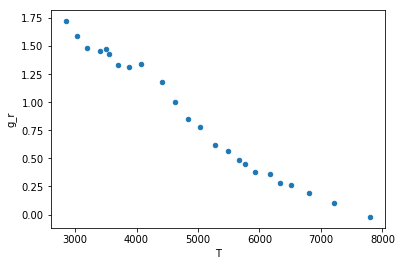

In [2]:
import pandas as pd

params=pd.read_csv('/home/ekaterina/Documents/appaloosa/stars_shortlist/static/merged_specs.csv')
print(params.columns.values)
%matplotlib inline
params = params[(params['T']<8000.) & (params['T']>2000.)]
params.plot(x='T',y='g_r',kind='scatter')